In [1]:
# change wokring directory to the root of the project (where jupyter was started)
import os
import psutil
%cd {psutil.Process(os.getpid()).parent().cwd()}

/home/matej/prace/ferda/ferda_github


In [2]:
!git rev-parse HEAD

7f6c996a85ebb4d145e2ac2db288838933a2e316


In [3]:
# !git checkout 7f6c996a85ebb4d145e2ac2db288838933a2e316

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
from imageio import imread
import numpy as np
import os
from os.path import join
import scripts.CNN.trash.train_interactions as train_interactions
import pandas as pd
import yaml
import warnings
pd.set_option('precision', 2)

Using TensorFlow backend.


In [6]:
DATA_DIR = '/home/matej/prace/ferda/data/interactions/180326_1k_36rot_mask'
EXPERIMENT_DIR = '/home/matej/prace/ferda/experiments/180502_1535_mobilenet_mask_verification'
# SUB_EXPERIMENT = '0.9285714285714285'

In [8]:
pred = pd.read_csv(join(EXPERIMENT_DIR, 'predictions.csv'))  # str(SUB_EXPERIMENT), 
with open(join(EXPERIMENT_DIR, 'config.yaml'), 'r') as fr:  # str(SUB_EXPERIMENT), 
    metadata = yaml.load(fr)
ti = train_interactions.TrainInteractions(metadata['num_objects'])

In [10]:
y_test = pd.read_csv(join(DATA_DIR, 'test.csv'))  
for i in range(ti.num_objects):
    y_test['%d_angle_deg' % i] *= -1

In [13]:
# loss_alpha_batch = pd.read_csv(join(EXPERIMENT_DIR, 'results.csv'))    
# loss_alpha_batch

In [14]:
# loss_alpha_batch[loss_alpha_batch['loss_alpha'] == float(SUB_EXPERIMENT)]

In [17]:
# ax = loss_alpha_batch.plot('loss_alpha', ['xy MAE', 'angle MAE'], title='mean absolute errors')
# ax.set_ylabel('deg, px')
# ax.set_xlabel('alpha')
# # ax.set_ylim(0, 24)
# ax.vlines(SUB_EXPERIMENT, ax.get_ylim()[0], ax.get_ylim()[1],
#           'r')
# ax.legend(['xy', 'angle', 'best alpha'])

# Predictions

In [18]:
pred.describe()

,0_x,0_y,0_angle_deg,1_x,1_y,1_angle_deg
count,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00
mean,112.35,103.44,8.14,90.60,104.26,-7.95
std,7.99,15.93,49.92,8.08,15.70,44.97
min,89.41,67.24,-90.00,63.52,63.53,-90.00
25%,106.51,89.21,-34.77,84.86,90.87,-45.90
50%,112.32,103.08,12.89,90.46,104.59,-7.10
75%,118.64,117.94,51.46,95.90,118.31,29.05
max,134.63,140.93,89.94,118.40,140.55,85.91


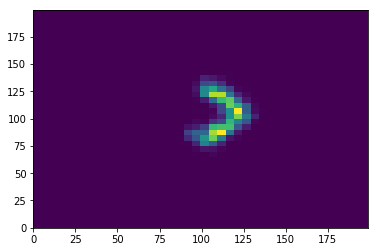

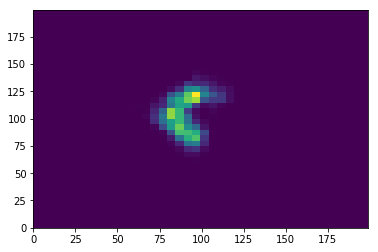

In [20]:
for i in range(metadata['num_objects']):
    plt.figure()
    _ = plt.hist2d(pred['%d_x' % i], pred['%d_y' % i], bins=40, range=((0, 199), (0, 199)))

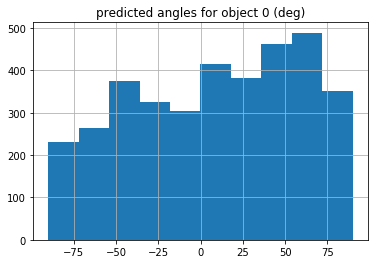

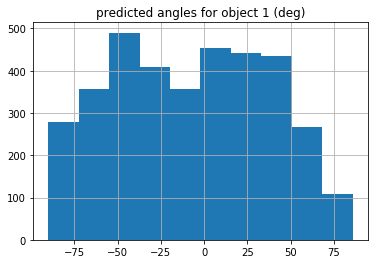

In [21]:
for i in range(metadata['num_objects']):
    plt.figure()
    plt.title('predicted angles for object %d (deg)' % i)
    (pred['%d_angle_deg' % i]).hist()

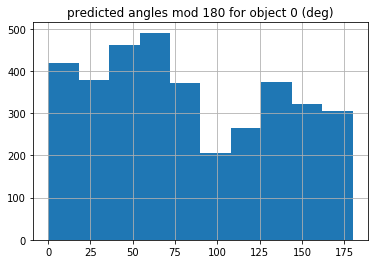

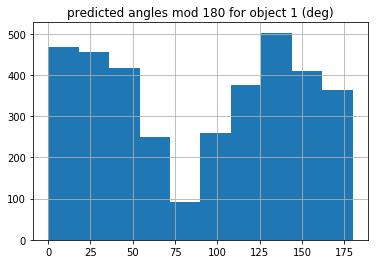

In [24]:
for i in range(metadata['num_objects']):
    plt.figure()
    plt.title('predicted angles mod 180 for object %d (deg)' % i)
    (pred['%d_angle_deg' % i] % 180).hist()

# Prediction Errors

In [35]:
errors, errors_xy, swap_indices = ti.match_pred_to_gt_numpy(pred[ti.array.columns()].values, y_test[ti.array.columns()].values)
errors_angle = np.hstack([errors[:, ti.array.prop2idx_(i, 'angle_deg')] for i in range(metadata['num_objects'])])

In [46]:
errors_xy.shape

(3600, 2)

In [44]:
errors_angle.shape

(3600, 2)

In [47]:
df = pd.DataFrame.from_items([('xy (px)', [errors_xy.mean()]), 
                              ('angle (deg)', errors_angle.mean()),])
df.style.set_caption('MAE')
df

,xy (px),angle (deg)
0,7.2,9.68


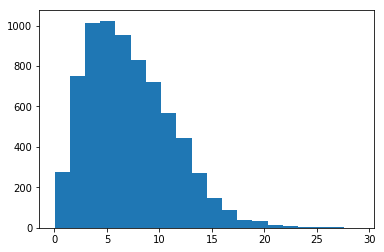

In [43]:
_  = plt.hist(errors_xy.flatten(), 20)

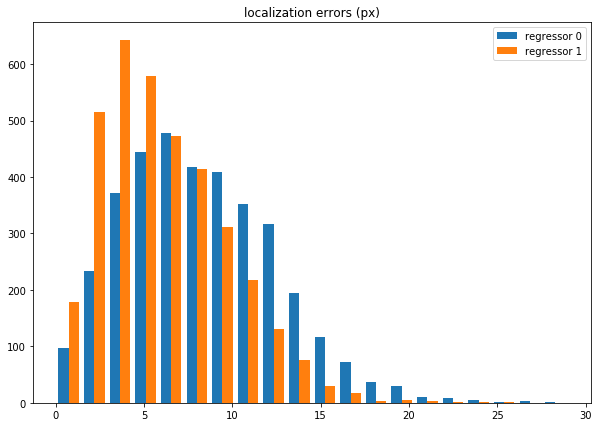

In [66]:
plt.figure(figsize=(10, 7))
_ = plt.hist(errors_xy, 20, label=['regressor {}'.format(i) for i in range(metadata['num_objects'])])
plt.legend()
_ = plt.title('localization errors (px)')    

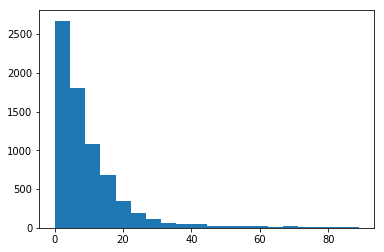

In [49]:
_ = plt.hist(errors_angle.flatten(), 20) # , range=(0, 20))

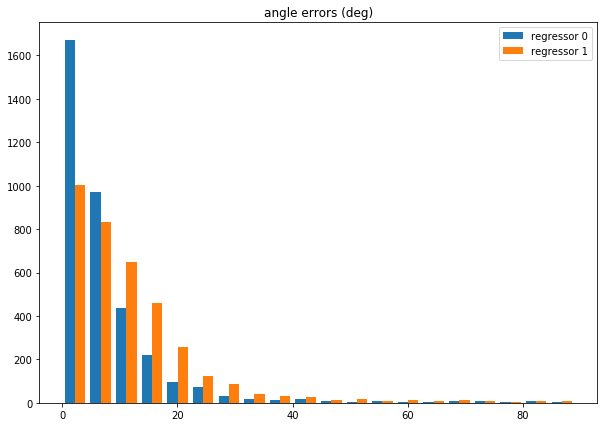

In [65]:
plt.figure(figsize=(10, 7))
_ = plt.hist(errors_angle, 20, label=['regressor {}'.format(i) for i in range(metadata['num_objects'])])
plt.legend()
_ = plt.title('angle errors (deg)')